## Multimodal Emotion Recognition - Full system

### FileProcessor

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
import sys
import os
# insert the path to the source code directory
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)



In [2]:
import kagglehub

# Download dataset
file_path = kagglehub.dataset_download("dejolilandry/iemocapfullrelease")
# Check subfolders
print("Subfolders in the dataset:", os.listdir(file_path))

labels_path = kagglehub.dataset_download("samuelsamsudinng/iemocap-emotion-speech-database")
labels_path = os.path.join(labels_path, "iemocap_full_dataset.csv")
# Load the labels CSV file
labels_df = pd.read_csv(labels_path)
allowed_emotions = ['neu', 'sad', 'ang', 'hap', 'sur', 'fea', 'dis']
df = labels_df[labels_df['emotion'].isin(allowed_emotions)].sample(100)
df['filename'] = df['path'].progress_apply(lambda x: os.path.join(file_path, "IEMOCAP_full_release", x))
print(df.head())
print(df['emotion'].value_counts())

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Subfolders in the dataset: ['IEMOCAP_full_release']


Processing...: 100%|██████████| 100/100 [00:00<00:00, 35818.14it/s]

      session  method gender emotion  n_annotators  agreement  \
309         1   impro      M     sad             4          4   
3670        3  script      F     ang             3          3   
1293        1   impro      M     ang             4          4   
683         1  script      F     neu             3          2   
4335        3   impro      F     sad             4          4   

                                                   path  \
309   Session1/sentences/wav/Ses01M_impro06/Ses01M_i...   
3670  Session3/sentences/wav/Ses03F_script03_2/Ses03...   
1293  Session1/sentences/wav/Ses01M_impro01/Ses01M_i...   
683   Session1/sentences/wav/Ses01F_script02_2/Ses01...   
4335  Session3/sentences/wav/Ses03F_impro06/Ses03F_i...   

                                               filename  
309   /Users/sofiafernandes/.cache/kagglehub/dataset...  
3670  /Users/sofiafernandes/.cache/kagglehub/dataset...  
1293  /Users/sofiafernandes/.cache/kagglehub/dataset...  
683   /Users/sofiafern

In [3]:
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
from src.processor import FileProcessor
from src.recognizers import SpeechEmotionRecognizer

# Initialize the FileProcessor
processor = FileProcessor()
# Initialize the SpeechEmotionRecognizer
recognizer = SpeechEmotionRecognizer()

def analyze_file(file_path):
    # Process the file to extract audio
    modalities = processor.process_file(file_path)
    # Recognize emotion from the audio
    emotion = recognizer.analyze(modalities['audio']['raw'], modalities['audio']['sample_rate'])
    return emotion

#df['preds_audio2'] = df['filename'].progress_apply(analyze_file)


2025-08-03 15:39:55.366348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
from src.assistant import EmotionRecognitionAssistant
assistant = EmotionRecognitionAssistant()
df['preds'] = df['filename'].progress_apply(assistant.analyze)

Processing...: 100%|██████████| 100/100 [16:49<00:00, 10.10s/it]


In [5]:
df.head()

,session,method,gender,emotion,n_annotators,agreement,path,filename,preds
309,1,impro,M,sad,4,4,Session1/sentences/wav/Ses01M_impro06/Ses01M_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Exactly, ..."
3670,3,script,F,ang,3,3,Session3/sentences/wav/Ses03F_script03_2/Ses03...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' This is t...
1293,1,impro,M,ang,4,4,Session1/sentences/wav/Ses01M_impro01/Ses01M_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Don't was...
683,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_2/Ses01...,/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Listen, w..."
4335,3,impro,F,sad,4,4,Session3/sentences/wav/Ses03F_impro06/Ses03F_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Turned ar...


In [6]:
df.iloc[0].preds

{'text_emotion': {'transcription': ' Exactly, you know, and I keep so many plants he was gonna do.',
  'emotion': 'happy'},
 'audio_emotion': {'emotions': ['neutral']}}

In [7]:
df['audio_preds'] = df['preds'].progress_apply(lambda x: x['audio_emotion']['emotions'][0])
df['text_preds'] = df['preds'].progress_apply(lambda x: x['text_emotion']['emotion'] if 'text_emotion' in x.keys() else None)
df.head()


Processing...: 100%|██████████| 100/100 [00:00<00:00, 111728.93it/s]


,session,method,gender,emotion,n_annotators,agreement,path,filename,preds,audio_preds,text_preds
309,1,impro,M,sad,4,4,Session1/sentences/wav/Ses01M_impro06/Ses01M_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Exactly, ...",neutral,happy
3670,3,script,F,ang,3,3,Session3/sentences/wav/Ses03F_script03_2/Ses03...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' This is t...,angry,neutral
1293,1,impro,M,ang,4,4,Session1/sentences/wav/Ses01M_impro01/Ses01M_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Don't was...,angry,angry
683,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_2/Ses01...,/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Listen, w...",sad,happy
4335,3,impro,F,sad,4,4,Session3/sentences/wav/Ses03F_impro06/Ses03F_i...,/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Turned ar...,sad,happy


In [8]:
df = df.dropna(subset=['audio_preds', 'text_preds'])

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
map_labels = {
    'neu': 'neutral',
    'sad': 'sad',
    'ang': 'angry',
    'hap': 'happy',
    'sur': 'surprise',
    'fea': 'fear',
    'dis': 'disgust'
}
df['label'] = df['emotion'].map(map_labels)
#df['preds_audio1'] = df['preds_audio2'].progress_apply(lambda x: x['emotions'][0])
print(classification_report(df['label'], df['text_preds']))
print(confusion_matrix(df['label'], df['text_preds']))

              precision    recall  f1-score   support

       angry       0.62      0.20      0.30        25
      cheers       0.00      0.00      0.00         0
     excited       0.00      0.00      0.00         0
        fear       0.00      0.00      0.00         0
  frustrated       0.00      0.00      0.00         0
       happy       0.26      0.38      0.31        13
        love       0.00      0.00      0.00         0
     neutral       0.52      0.68      0.59        37
         sad       0.75      0.25      0.38        24
    surprise       0.00      0.00      0.00         0
       worry       0.00      0.00      0.00         0

    accuracy                           0.41        99
   macro avg       0.20      0.14      0.14        99
weighted avg       0.57      0.41      0.43        99

[[ 5  0  1  0  1  6  1  9  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1

In [10]:
print(classification_report(df['label'], df['audio_preds']))
print(confusion_matrix(df['label'], df['audio_preds']))

              precision    recall  f1-score   support

       angry       0.79      0.76      0.78        25
       happy       1.00      0.08      0.14        13
     neutral       0.57      0.70      0.63        37
         sad       0.57      0.67      0.62        24

    accuracy                           0.63        99
   macro avg       0.73      0.55      0.54        99
weighted avg       0.68      0.63      0.60        99

[[19  0  5  1]
 [ 3  1  8  1]
 [ 1  0 26 10]
 [ 1  0  7 16]]


In [ ]:
df.label.value_counts()

label
neutral    37
angry      25
sad        24
happy      13
Name: count, dtype: int64

: 

In [ ]:
df.text_preds.value_counts()

text_preds
{'error': 'name 'max_retries' is not defined'}    99
Name: count, dtype: int64

: 

In [ ]:
from src.processor import FileProcessor
from src.recognizers import SpeechEmotionRecognizer
# Initialize the FileProcessor
processor = FileProcessor()
# Initialize the SpeechEmotionRecognizer
recognizer = SpeechEmotionRecognizer()
# Define the file path to the audio file

In [ ]:
from src.assistant import EmotionRecognitionAssistant

from tqdm import tqdm
assistant = EmotionRecognitionAssistant()
#processor = FileProcessor()
# Process a few files from the dataset
paths = labels_df['path'].tolist()[:10]
for path in tqdm(paths):
    full_path = os.path.join(file_path, "IEMOCAP_full_release", path)
    print(f"Processing file: {full_path}")
    result = assistant.analyze(full_path)
    #result = processor.process_file(full_path)
    print(result)


  0%|          | 0/10 [00:00<?, ?it/s]

Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F000.wav


 10%|█         | 1/10 [00:18<02:43, 18.21s/it]

{'text_emotion': {'transcription': ' Come on.', 'emotion': 'happy'}, 'audio_emotion': {'emotions': ['fear']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F001.wav


 20%|██        | 2/10 [00:21<01:13,  9.18s/it]

{'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F002.wav


 30%|███       | 3/10 [00:26<00:50,  7.28s/it]

{'text_emotion': {'transcription': ' What?', 'emotion': 'surprise'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F003.wav


 40%|████      | 4/10 [00:30<00:37,  6.30s/it]

{'text_emotion': {'transcription': " We're flashlight", 'emotion': 'Happy'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F004.wav


 50%|█████     | 5/10 [00:36<00:30,  6.02s/it]

{'text_emotion': {'transcription': " That's not your flashlight.", 'emotion': 'anger'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F005.wav


 60%|██████    | 6/10 [00:41<00:23,  5.87s/it]

{'text_emotion': {'transcription': " It's hours, it's my flashlight too.", 'emotion': 'fear'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F006.wav


 70%|███████   | 7/10 [00:48<00:17,  6.00s/it]

{'text_emotion': {'transcription': " You keep saying my flashlight, like it's just yours.", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F007.wav


 80%|████████  | 8/10 [00:54<00:12,  6.00s/it]

{'text_emotion': {'transcription': " How's that supposed to make me feel?", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F008.wav


 90%|█████████ | 9/10 [00:59<00:05,  5.88s/it]

{'text_emotion': {'transcription': ' Yeah', 'emotion': 'Surprised.'}, 'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F009.wav


100%|██████████| 10/10 [01:12<00:00,  7.29s/it]

{'text_emotion': {'transcription': " Y'know.", 'emotion': 'no emotion'}, 'audio_emotion': {'emotions': ['fear']}}


In [45]:
import os
import tempfile
import cv2
import whisper #pip install git+https://github.com/openai/whisper.git
import librosa
from PyPDF2 import PdfReader
from docx import Document
from moviepy.editor import VideoFileClip
from PIL import Image


class FileProcessor:
    def __init__(self):
        self.file_types = {
            'text': ['txt', 'pdf', 'docx'],
            'audio': ['mp3', 'wav', 'sph'],
            'image': ['jpg', 'jpeg', 'png'],
            'video': ['mp4', 'avi', 'mov', 'webm']
        }
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.transcriber = whisper.load_model("base") 

    def process_file(self, file_path):
        """Main processing method"""
        if not os.path.isfile(file_path):
            return {"error": "File not found"}

        file_type = self._detect_file_type(file_path)

        try:
            if file_type == 'text':
                return self._process_text(file_path)
            elif file_type == 'audio':
                return self._process_audio(file_path)
            elif file_type == 'image':
                return self._process_image(file_path)
            elif file_type == 'video':
                return self._process_video(file_path)
            else:
                return {"error": "Unsupported file type"}
        except Exception as e:
            return {"error": str(e)}

    def _detect_file_type(self, file_path):
        """Detect file type category"""
        ext = file_path.split('.')[-1].lower()
        for category, extensions in self.file_types.items():
            if ext in extensions:
                return category
        return 'unknown'

    def _process_text(self, file_path):
        """Process text-based files"""
        ext = file_path.split('.')[-1].lower()
        text = ''

        if ext == 'txt':
            with open(file_path, 'r') as f:
                text = f.read()
        elif ext == 'pdf':
            with open(file_path, 'rb') as f:
                reader = PdfReader(f)
                text = '\n'.join([page.extract_text() for page in reader.pages])
        elif ext == 'docx':
            doc = Document(file_path)
            text = '\n'.join([para.text for para in doc.paragraphs])

        return {"text": text}

    def _process_audio(self, file_path, chunk_duration=3, hop_duration=1):
        """Load audio files and transcribe them"""
        audio, sr = librosa.load(file_path, sr=16000)
        transcript = self.transcriber.transcribe(audio)
        segments = transcript['segments']
        audio_chunks = [audio[int(seg['start'] * sr):int(seg['end'] * sr)] for seg in segments]

        return {
            "text": transcript['text'],
            "segments": segments,
            "audio": {
                "raw": audio,
                "audio_chunks": audio_chunks,
                "sample_rate": sr,
            }
        }


    def _process_image(self, file_path):
        """Process image files with face detection"""
        img = cv2.imread(file_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
        if len(faces) > 0:
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]
            pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        else:
            pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        return {"image": pil_image}

    def _process_video(self, file_path):
        """Process video files with frame extraction and audio processing"""
        result = {}
        with tempfile.NamedTemporaryFile(suffix='.wav') as tmpfile:
            video = VideoFileClip(file_path)
            if video.audio:
                video.audio.write_audiofile(tmpfile.name)
                audio_result = self._process_audio(tmpfile.name)
                result.update(audio_result)
            else:
                result["audio"] = None
                result["text"] = None

        cap = cv2.VideoCapture(file_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_interval = int(fps * 1)  # Every 1 second
        frame_count = 0
        frames = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % frame_interval == 0:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    x, y, w, h = faces[0]
                    face_img = frame[y:y+h, x:x+w]
                    pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
                    frames.append(pil_image)

            frame_count += 1

        cap.release()
        result["frames"] = frames
        return result

processor = FileProcessor()

In [46]:
#filename = emodb['filename'].to_list()[1]
filename = crema['filename'].to_list()[0]
#filename ="/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/01-01-05-02-02-01-01.mp4"
#filename = "/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/Ses01F_impro01.avi"
result = processor.process_file(filename)
print(result['text'])

 I think I've seen this before.


In [29]:
result['audio']['audio_chunks'][1]

array([0.01741896, 0.01392634, 0.00778588, ..., 0.00131959, 0.00121908,
       0.00037531], dtype=float32)

In [47]:
import pickle
from joblib import dump, load
import opensmile

class SpeechEmotionRecognizer:
    def __init__(self, model_path='/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/notebooks/speech/ser_svm_model3.joblib'):
        try:
            with open(model_path, 'rb') as file:
                #self.model = pickle.load(file)
                self.model = load(file)
        except FileNotFoundError:
            self.model = None
            print(f"Warning: Speech emotion recognizer model not found at {model_path}")
        except Exception as e:
            self.model = None
            print(f"Error loading speech emotion recognizer: {e}")

    def extract_features(self, audio, sr):
        smile = opensmile.Smile(
            feature_set=opensmile.FeatureSet.GeMAPSv01b,
            feature_level=opensmile.FeatureLevel.Functionals,
        )
        features = smile.process_signal(audio, sr)
        return features.values

    def analyze(self, audio, sr):
        if self.model is None:
            return {"error": "Speech emotion recognizer model not loaded"}
        features = self.extract_features(audio, sr)
        try:
            prediction = self.model.predict(features)
            return {"emotions": prediction.tolist()} # Return as list for JSON
        except Exception as e:
            return {"error": f"Error during audio emotion analysis: {e}"}
        
ser = SpeechEmotionRecognizer()

In [48]:
from tqdm import tqdm
chunks_emotion = []
for chunk in tqdm(result['audio']['audio_chunks']):
    sr = result['audio']['sample_rate']
    audio_emotion_result = ser.analyze(chunk, sr)
    chunks_emotion.append(audio_emotion_result)

100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


In [49]:
for segment, emotion in zip(result['segments'], chunks_emotion):
    print(f"Text: {segment['text']}\nEmotion: {emotion['emotions'][0]}")

Text:  I think I've seen this before.
Emotion: angry


In [ ]:
crema.iloc[0]

label                                                   angry
filename    /Users/sofiafernandes/.cache/kagglehub/dataset...
Name: 0, dtype: object

: 

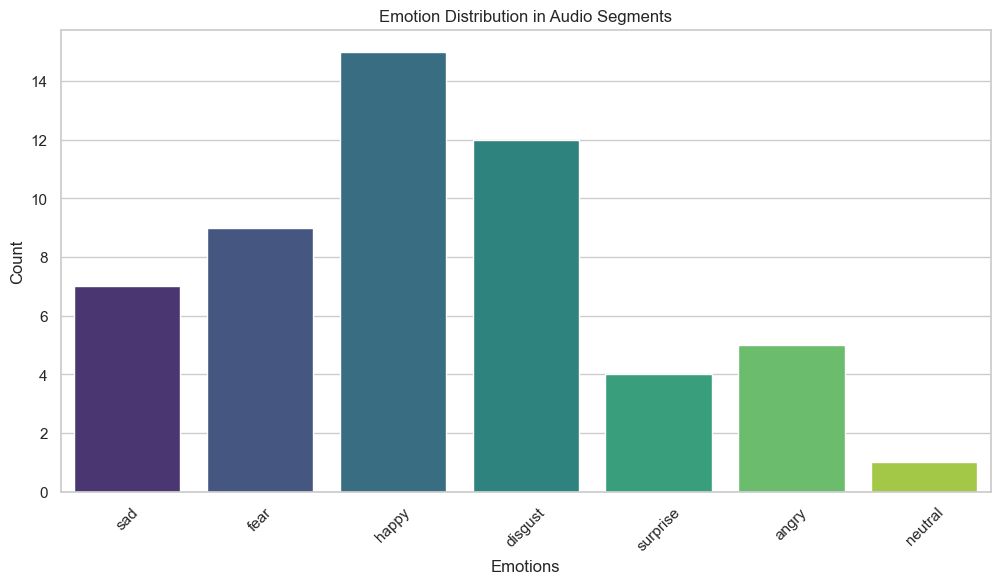

In [43]:
emos = [emotion['emotions'][0] for emotion in chunks_emotion]
#plotting the emotions
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=emos, palette="viridis")
plt.title('Emotion Distribution in Audio Segments')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
filenames = emodb['filename'].to_list()
for filename in filenames:
    result = processor.process_file(file_path)
    print(result)

{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable